In [24]:
# 필요한 라이브러리 임포트&설치
# !pip install dbfread
# !pip install haversine
# !pip install sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine
from tqdm.notebook import tqdm
%matplotlib inline
import platform
import pickle
import re
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

출처:https://www.sen.go.kr/web/services/bbs/bbsList.action?bbsBean.bbsCd=65

In [25]:
element_pop = pd.read_excel(r'./data/2019년+하반기+유초중등+교육통계조사+주요통계+세부자료.xlsx',sheet_name=4)

In [26]:
element_pop.head(20)

,2019년 유초중등교육통계 하반기,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,05. 학교별 주요 통계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"* 학급수는 일반학급 및 순회학급, 특수학급포함",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"* 학생수는 일반학급 및 순회학급, 특수학급포함",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"* 교원수는 퇴직자는 제외이며, 휴직자는 포함",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"* 직원수는 퇴직자 제외이며, 직종에서 기타도 제외함.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,* 유치원은 시범조사로 일부 자료 포함하지 않음.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"* 방송통신 중, 고는 하반기 조사 대상이 아니므로 본 자료에서 제외함(상반기 자료...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,* 기준일 : 2019.10.1.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
def prepro(df):
#     df.reset_index(inplace=True)
    df_need = df.rename(columns=df.iloc[10]).drop(df.index[:11])
    return df_need

In [28]:
element_pop_need = prepro(element_pop)[['지역교육청','행정구역','학제','학교명','설립유형','학급수','학생수','교원']]
element_pop_need.dropna(inplace=True)
element_pop_need

,지역교육청,행정구역,학제,학교명,설립유형,학급수,학생수,교원
12,중부,종로구,유치원,린덴바움유치원,사립,9,173,17
13,중부,종로구,유치원,배화여자대학교 부속 배화유치원,사립,3,75,5
14,중부,종로구,유치원,봄샘유치원,사립,3,62,6
15,중부,종로구,유치원,상명사대부속유치원,사립,6,144,8
16,중부,종로구,유치원,서울명신초등학교병설유치원,공립,3,57,4
...,...,...,...,...,...,...,...,...
2207,서울시,은평구,각종학교,은평문화예술정보학교,공립,9,0,23
2208,서울시,마포구,각종학교,아현산업정보학교,공립,27,0,59
2209,서울시,금천구,각종학교,금천문화예술정보학교,공립,10,0,24
2210,서울시,관악구,각종학교,서울산업정보학교,공립,18,0,48


In [29]:
element_pop_df = element_pop_need[element_pop_need.학제=='초등학교']
element_pop_df

,지역교육청,행정구역,학제,학교명,설립유형,학급수,학생수,교원
849,중부,종로구,초등학교,상명대학교사범대학부속초등학교,사립,12,285,14
850,중부,종로구,초등학교,서울교동초등학교,공립,11,174,20
851,중부,종로구,초등학교,서울대학교사범대학부설초등학교,국립,31,622,48
852,중부,종로구,초등학교,서울독립문초등학교,공립,27,495,46
853,중부,종로구,초등학교,서울매동초등학교,공립,16,270,28
...,...,...,...,...,...,...,...,...
1451,강동송파,강동구,초등학교,서울위례초등학교,공립,0,0,0
1452,강동송파,강동구,초등학교,서울천동초등학교,공립,40,868,58
1453,강동송파,강동구,초등학교,서울천일초등학교,공립,20,356,31
1454,강동송파,강동구,초등학교,서울천호초등학교,공립,39,734,58


# 바로 돌려보고싶으면 여기부터...

In [33]:
element_pop_df = pd.read_csv('./초등학교별 전교생데이터.csv')
element_pop_df

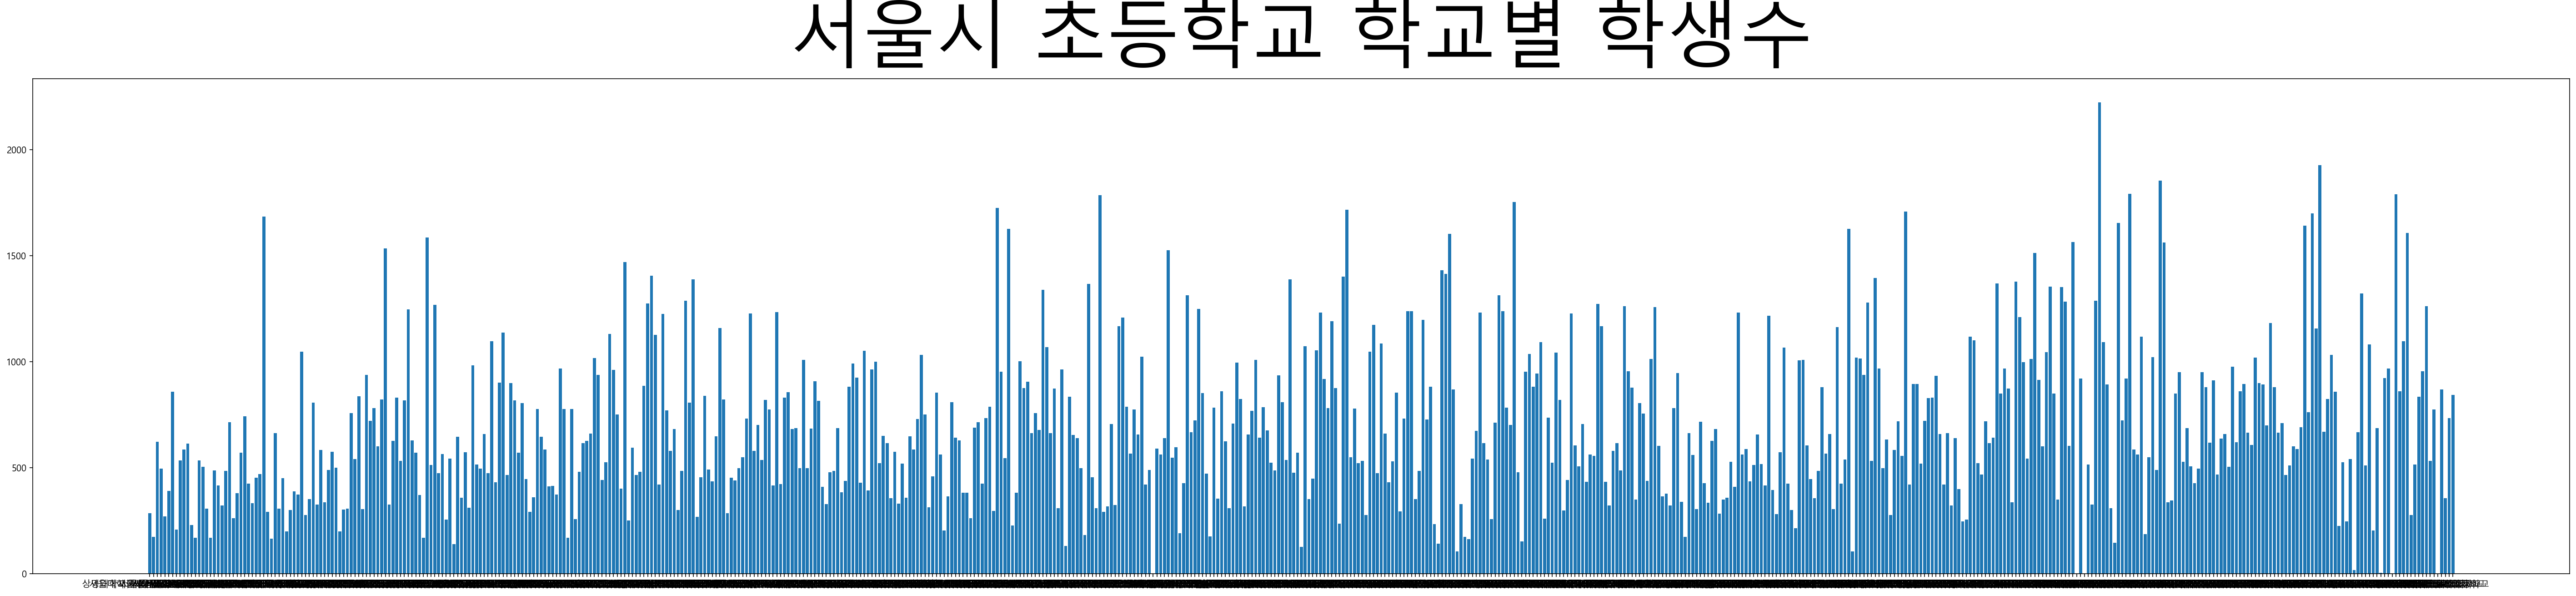

In [30]:
x = element_pop_df.학교명
y = element_pop_df.학생수
plt.figure(figsize=(50, 10))
plt.title(label='서울시 초등학교 학교별 학생수', fontdict={'fontsize':80})
plt.bar(x, y)
plt.show()

### 초등학교 위도경도 데이터와 이름중심으로 merge하고, 저 위에 위례초등학교는 왜0명인지 모르겠지만.. 지도시각화 해봐야할듯

In [31]:
# element_pop_df.to_csv('./초등학교별 전교생데이터.csv')